### Reading signals

This notebook reads the signals send in output by the board

In [9]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

import alsaaudio as aa

import time
import struct

In [10]:
# Format parameters
format = aa.PCM_FORMAT_S16_LE # Signed 16 bit integer in Little Endian format
pack_format = 'h' # short int (2 bytes) matching the format

channels = 2 # This is practically the only possibility as far as I managed to understand :|
rate = 192000 # Maximum rate supported by the board


In [11]:
inp = aa.PCM(aa.PCM_CAPTURE, aa.PCM_NONBLOCK, channels=channels, rate=rate, format=format, periodsize=128*5, cardindex=2)
full_data = []

loops = 10000
while loops > 0:
	loops -= 1
	# Read data from device
	l, data = inp.read()

	if l < 0:
		print("Capture buffer overrun! Continuing nonetheless ...")
	elif l:
		full_data.append(data)
		time.sleep(.001)

In [12]:
print(len(full_data))

9993


In [21]:
bytes_list = b''

for element in full_data:
    bytes_list = bytes_list + element

iter = struct.iter_unpack(pack_format, bytes_list)

unpacked_data = []

for it in iter:
    unpacked_data.append(it)

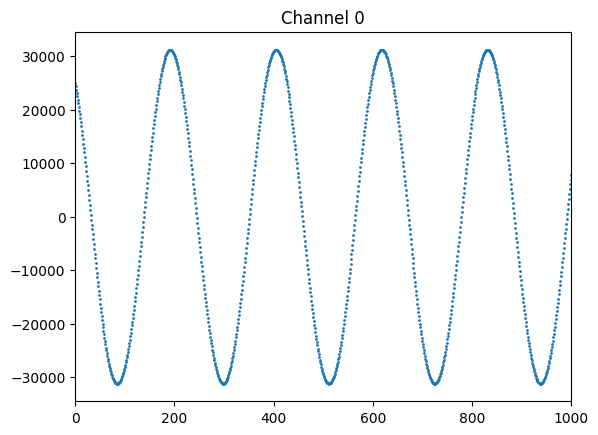

In [23]:
plt.plot(unpacked_data[::2], marker='o', linestyle='', markersize=1)
plt.title('Channel 0')
plt.xlim(0,1000);

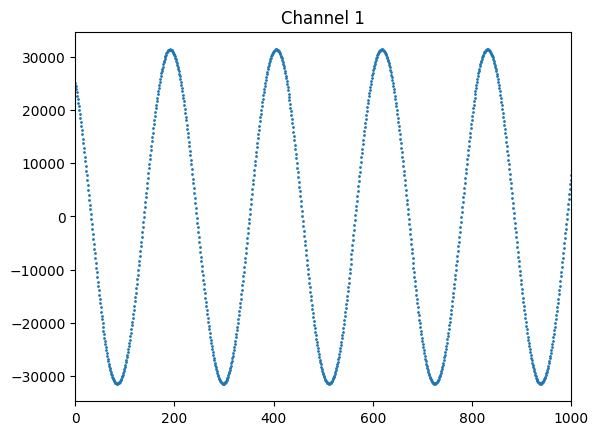

In [15]:
plt.plot(unpacked_data[1::2], marker='o', linestyle='', markersize=1)
plt.title('Channel 1')
plt.xlim(0,1000);

In [16]:
inp.close()